# Лабораторна робота №10

## Тема: Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена
## Мета: Навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

## 1. Опрацювати короткі теоретичні відомості

## 2. Побудувати дерево кодів Гафмена згідно з варіантом, виданим викладачем вручну і візуалізувати дерево.
## Маємо текст AAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCC. Закодувати текст, використовуючи алгоритм Гафмена. Побудувати двійкове дерево. Оцінити ефект від кодування порівняно з неоптимальним випадком.

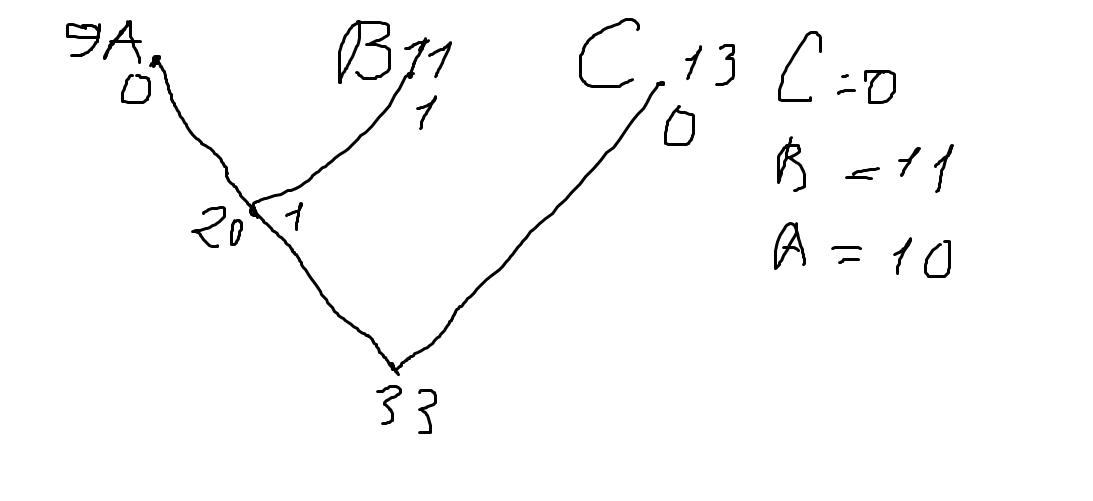

## 3. Перевірити результат за допомогою коду, наведеному вище.

In [19]:
import heapq
class node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''
    def __lt__(self, nxt):
        return self.freq < nxt.freq
def printNodes(node, val=''):
    newVal = val + str(node.huff)
    if(node.left):
        printNodes(node.left, newVal)
    if(node.right):
        printNodes(node.right, newVal)
    if(not node.left and not node.right):
        print(f"{node.symbol} -> {newVal}")
chars = ['a', 'b', 'c']
freq = [9, 11, 13]
nodes = []
for x in range(len(chars)):
    heapq.heappush(nodes, node(freq[x], chars[x]))
while len(nodes) > 1:
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)
    left.huff = 0
    right.huff = 1
    newNode = node(left.freq+right.freq, left.symbol+right.symbol, left, right)
    heapq.heappush(nodes, newNode)
printNodes(nodes[0])

TypeError: 'str' object is not callable

## 4. Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq.

In [ ]:
def compute_char_frequencies(message):
    chars = []
    freq = []
    for ch in message:
        if ch in chars:
            index = chars.index(ch)
            freq[index] += 1
        else:
            chars.append(ch)
            freq.append(1)
    return chars, freq
text = "AAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCC"
chars, freq = compute_char_frequencies(text)

print("Символи:", chars)
print("Частоти:", freq)


## 5. Декодування Гаффмена.

In [ ]:
import heapq
from collections import defaultdict
codes = {}
freq = defaultdict(int)
class MinHeapNode:
    def __init__(self, data, freq):
        self.left = None
        self.right = None
        self.data = data
        self.freq = freq
    def __lt__(self, other):
        return self.freq < other.freq
def printCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        print(root.data, ":", str)
    printCodes(root.left, str + "0")
    printCodes(root.right, str + "1")
def storeCodes(root, str):
    if root is None:
        return
    if root.data != '$':
        codes[root.data] = str
    storeCodes(root.left, str + "0")
    storeCodes(root.right, str + "1")
def HuffmanCodes(size):
    global minHeap
    for key in freq:
        minHeap.append(MinHeapNode(key, freq[key]))
    heapq.heapify(minHeap)
    while len(minHeap) != 1:
        left = heapq.heappop(minHeap)
        right = heapq.heappop(minHeap)
        top = MinHeapNode('$', left.freq + right.freq)
        top.left = left
        top.right = right
        heapq.heappush(minHeap, top)
    storeCodes(minHeap[0], "")
def calcFreq(str, n):
    for i in range(n):
        freq[str[i]] += 1
def decode_file(root, s):
    ans = ""
    curr = root
    n = len(s)
    for i in range(n):
        if s[i] == '0':
            curr = curr.left
        else:
            curr = curr.right
        if curr.left is None and curr.right is None:
            ans += curr.data
            curr = root
    return ans + '\0'
if __name__ == "__main__":
    minHeap = []
    str = "AAAAAAAAABBBBBBBBBBBCCCCCCCCCCCCC"
    encodedString, decodedString = "", ""
    calcFreq(str, len(str))
    HuffmanCodes(len(str))
    print("Character With there Frequencies:")
    for key in sorted(codes):
        print(key, codes[key])
    for i in str:
        encodedString += codes[i]
    print("\nEncoded Huffman data:")
    print(encodedString)
    decodedString = decode_file(minHeap[0], encodedString)
    print("\nDecoded Huffman Data:")
    print(decodedString)

## 6. Контрольні питання

### 1. Це евристичний метод для знаходження наближеного розв’язку екстремальних задач.
### 2. Це такий тип кодування, у якому жодне закодоване слово (код символу) не є префіксом іншого. Саме префіксний код і використовується в кодуванні Гафмена.
### 3. Купа - це один з видів реалізації черги з пріорітетами, оскільки в обох варіантах ми працюємо саме за пріоритетом певних даних.
### 4. Це процес перетворення даних у таку форму, яка займає менше пам’яті або об’єму при передачі, ніж оригінальна. Використовують для зменшення розміру даних без втрати, або з мінімальною втратою їхньої інформативності. Переваги - займає менше місця на носії, велика швидкість передачі даних, збільшення ємності резервного пакування.
### 5. Беремо дві вершини з найменшою частотою. Створюємо внутрішній вузол з частотою, що дорівнює сумі частот цих двох вузлів, після цього робимо першу вилучену вершину -  її лівим дочірнім елементом, а другу – правим дочірнім елементом. Додаємо цю вершину до мінімальної купи та повторюємо, поки не пройдемо всі вершини. Зліва ставимо 0, справа 1, так само позначаємо всі вершини. Після обходу вершин отримуємо код символу.
### 6. Недоліки: потрібен попередній прохід для обчислення частот, алгоритм не адаптивний, існує необхідність зберігання таблиці кодів. Можна покращити, використавши адаптивне кодування Гафмена, яке усуває необхідність попереднього проходу, або використати в поєднанні з іншими алгоритмами.
### 7. Арифметичне кодування, кодування Барроуза-Вілера, Аагоритм Лемпеля-Зіва. 
### 8. Архівація файлів, передача даних по мережі, стиснення мультимедійних даних, бази даних.

## Висновки

### Під час цієї лабораторної роботи ми навчились реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.